<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Network-understanding" data-toc-modified-id="Network-understanding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Network understanding</strong></a></span><ul class="toc-item"><li><span><a href="#Model-extraction" data-toc-modified-id="Model-extraction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong><em>Model extraction</em></strong></a></span></li><li><span><a href="#Training-explination" data-toc-modified-id="Training-explination-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong><em>Training explination</em></strong></a></span><ul class="toc-item"><li><span><a href="#Confidence-Maps-for-Part-Detection" data-toc-modified-id="Confidence-Maps-for-Part-Detection-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><strong><em>Confidence Maps for Part Detection</em></strong></a></span></li><li><span><a href="#Part-Affinity-Fields-for-Part-Association" data-toc-modified-id="Part-Affinity-Fields-for-Part-Association-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span><strong><em>Part Affinity Fields for Part Association</em></strong></a></span></li><li><span><a href="#Flow-diagram-of-trainning" data-toc-modified-id="Flow-diagram-of-trainning-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span><strong><em>Flow diagram of trainning</em></strong></a></span></li></ul></li><li><span><a href="#Test-image" data-toc-modified-id="Test-image-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong><em>Test image</em></strong></a></span><ul class="toc-item"><li><span><a href="#Confidence-Maps-for-Part-Detection-and-Part-Affinity-Fields-for-Part-Association" data-toc-modified-id="Confidence-Maps-for-Part-Detection-and-Part-Affinity-Fields-for-Part-Association-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span><strong><em>Confidence Maps for Part Detection and Part Affinity Fields for Part Association</em></strong></a></span><ul class="toc-item"><li><span><a href="#Maps-for-Part-Detection" data-toc-modified-id="Maps-for-Part-Detection-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span><strong><em>Maps for Part Detection</em></strong></a></span></li><li><span><a href="#Part-Affinity-Fields-for-Part-Association" data-toc-modified-id="Part-Affinity-Fields-for-Part-Association-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span><strong>Part Affinity Fields for Part Association</strong></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Replication-of-results" data-toc-modified-id="Replication-of-results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Replication of results</strong></a></span></li><li><span><a href="#Applications" data-toc-modified-id="Applications-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Applications</strong></a></span><ul class="toc-item"><li><span><a href="#Problem-context" data-toc-modified-id="Problem-context-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Problem context</a></span></li><li><span><a href="#Database" data-toc-modified-id="Database-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Database</a></span></li><li><span><a href="#Architecture-implementation-in-videos" data-toc-modified-id="Architecture-implementation-in-videos-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Architecture implementation in videos</a></span></li><li><span><a href="#Pose-database-creation" data-toc-modified-id="Pose-database-creation-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Pose-database creation</a></span></li><li><span><a href="#RCNN-architecture" data-toc-modified-id="RCNN-architecture-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>RCNN architecture</a></span></li><li><span><a href="#Training-model" data-toc-modified-id="Training-model-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Training model</a></span></li><li><span><a href="#User-parameters" data-toc-modified-id="User-parameters-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>User parameters</a></span></li><li><span><a href="#Evaluation-of-model-performance" data-toc-modified-id="Evaluation-of-model-performance-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Evaluation of model performance</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Anexos:-GitHub-connection" data-toc-modified-id="Anexos:-GitHub-connection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong><em>Anexos: GitHub connection</em></strong></a></span></li></ul></div>

[#Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields]()

## Introduction

The estimation of human posture is the process of modeling the human body as a set of some parts (e.g., arms, legs, torso, etc.) and finding their positions in an image. Several studies have been developed in order to generate these estimates in real time using various techniques of Deep Learning. In this Notebook we study the development done in [[1]](https://ieeexplore-ieee-org.ezproxy.imt-atlantique.fr/document/8099626), which makes use of Part Affinity Fields for this purpose.

Inferring the pose of multiple people in images, especially socially engaged individuals, presents a unique set of challenges. First, each image may contain an unknown number of people that can occur at any position or scale. Second, interactions between people induce complex spatial interference, due to contact, occlusion, and limb articulations, making association of parts difficult. Third, runtime complexity tends to grow with the number of people in the image, making realtime performance a challenge.

In [[1]](https://ieeexplore-ieee-org.ezproxy.imt-atlantique.fr/document/8099626), a method for estimating the posture of various persons at multiple public reference points is presented. It uses the ascending representation of association scores through the part affinity fields (PAF), a set of 2D vector fields that encode the location and orientation of the limbs over the image domain. These bottom-up representations of detection and association are simultaneously inferred and encode the global context of the scene.

In [1]:
# Libraries
# Colab libraries
from google.colab import drive
from google.colab import output
drive.mount('/content/gdrive')
colab_path = "/content/gdrive/My Drive/Colab Notebooks/"

# Basis libraries
import os, re, sys, math, time, scipy, argparse, copy
import cv2, matplotlib, json
import numpy as np
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ipywidgets import Video

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from collections import OrderedDict
from scipy.ndimage.morphology import generate_binary_structure
from scipy.ndimage.filters import gaussian_filter, maximum_filter

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Settings

First, we will download the repository that we copied from [the original repository](https://github.com/tensorboy/pytorch_Realtime_Multi-Person_Pose_Estimation) in order to make some changes for educational purposes. Then, we install libraries and some dependences explained in the original repository.

In [2]:
# Independence install
!sudo apt-get install swig
%cd $colab_path
if not os.path.isdir("RT-multiperson-pose-pytorch"):
  # Repository clone
  !git clone https://github.com/Johansmm/RT-multiperson-pose-pytorch.git
  %cd "RT-multiperson-pose-pytorch"
  %cd lib/pafprocess 
  # Repository compile
  !sh make.sh

# Libraries install
%cd $colab_path"/RT-multiperson-pose-pytorch"
!python -m pip install -r ./requirements.txt
!git submodule init && git submodule update
# Weights download
if not os.path.isfile("./pose_model.pth"):
  !wget https://www.dropbox.com/s/ae071mfm2qoyc8v/pose_model.pth
output.clear()
print("[INFO]: Proyect uploaded successfully")

[INFO]: Proyect uploaded successfully


Now, we can import others libraries use in the project, contained in the repository.

In [3]:
# Framework libraries
%cd $colab_path"/RT-multiperson-pose-pytorch"
sys.path.append('.'); sys.argv=['']
from lib.network.rtpose_vgg import get_model 
from lib.network import im_transform
from evaluate.coco_eval import get_outputs, handle_paf_and_heat
from lib.utils.common import Human, BodyPart, CocoPart, CocoColors, CocoPairsRender, draw_humans
from lib.utils.paf_to_pose import paf_to_pose_cpp
from lib.config import cfg, update_config
from torchsummary import summary
from evaluate.coco_eval import get_outputs, handle_paf_and_heat, run_eval
from Librerias.Graphs_HeatPaf import Heatmapgraph,graphPAF,graphGridHeatmap,graphGridPaf #Libreries for Graphs

/content/gdrive/My Drive/Colab Notebooks/RT-multiperson-pose-pytorch


And update the variables space.

In [4]:
###########NETWORK CONFIG ############
class Namespace:
  def __init__(self, **kwargs):
    self.__dict__.update(kwargs)

# update config file
args = Namespace(cfg = './experiments/vgg19_368x368_sgd.yaml', weight = 'pose_model.pth', opts = [])
update_config(cfg, args)

## **Network understanding**

In general terms, the method developed for the Multi-Person 2D Pose Estimation is divided into several stages. In the figure, the general architecture of the system is shown. 

First, the system takes, as input, a $wxh$ size colour image,  the image is  analyzed by a convolutional network (initialized by the first 10 layers of VGG-19  and finetuned), generating a set of feature maps that is input to the first stage of 2 branchs. The two brach correspond to the parts of a feedforward network that simultaneously predicts, first a 2D confidence set $S = (S_{1},S_{2},...,S_{J})$ maps of the locations of the body parts $J$ one per location  (RKnee,Shoulder,Hip, etc) where 
$S_{j}\in \mathbb{R}^{wxh}, j \in {1,...,J}$; 
and a set of 2D vector fields of the affinities of the parts 
$L = (L_{1},L_{2},...,L_{C})$ , which encode the degree of association between the parts ,it has $C$ vector fields, one per limb( pairs of body parts ), where
 $L_{c}\in \mathbb{R}^{wxhx2},c \in {1,...,C}$

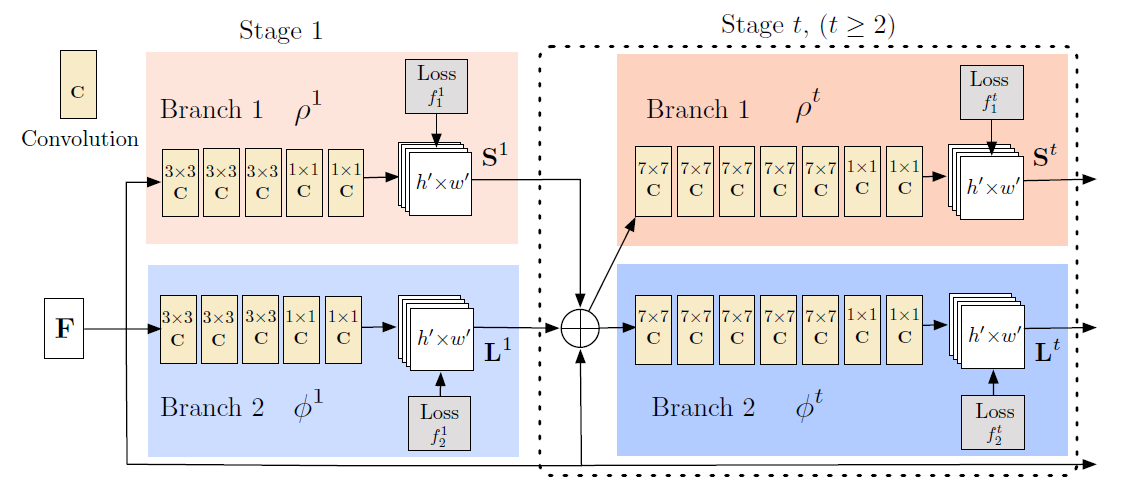

Next we will use the code picture_demo.py in order to explain the composition of the network, and the processes that are made in order to obtain the estimation of poses, considering that it is already trained

### ***Model extraction***

Initially, the input dimension image () is introduced into the first 10 layers of the CNN VGG-19 model, which is normally used for image classification, and produces a set of feature maps F that is input to the first stage of each branch.

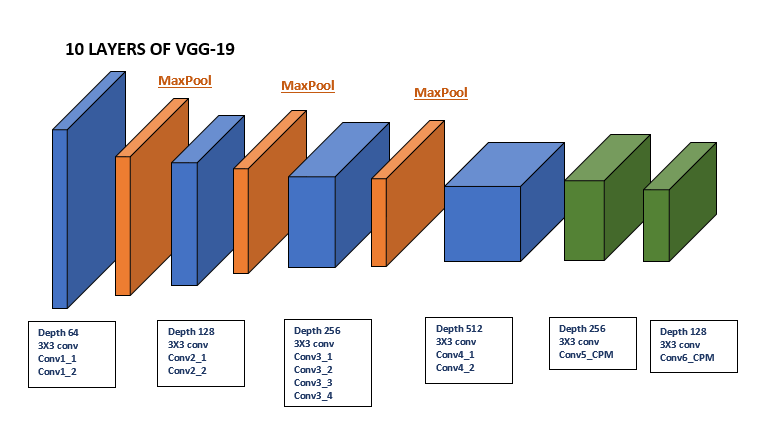

In order to make the prediction of the confidence maps (**S**) and the vector fields of the affinity of the parts PAFs (**L**) two brachs were designed, which are composed of 6 stages, however the process of optimization and execution is done in parallel. 

At the first stage, the network produces a set of detection confidence maps $S_{1} = \rho^{1} (F)$ and a set of part affinity fields $L_{1} = \phi^{1}(F)$, where $\rho^{1}$ and $\phi^{1}$ are the CNNs for inference at Stage 1. In each subsequent stage, the predictions from both branches in the previous stage,along with the original image features $F$, are concatenated and used to produce refined predictions, in other words a recurrent neuronal network (RNN).

$$S^{t} = \rho ^{t}(F,S^{t-1},L^{t-1}),\forall t \geq 2 $$

$$L^{t} = \phi ^{t}(F,S^{t-1},L^{t-1}),\forall t \geq 2 $$


The following figures present in more detail each subnetwork

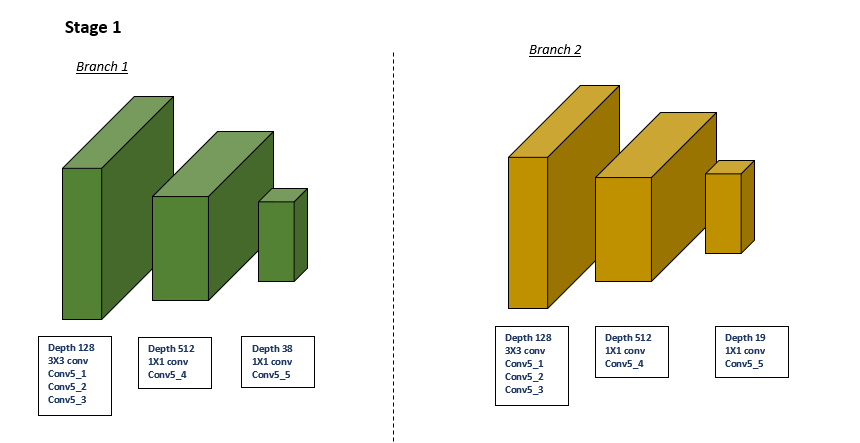

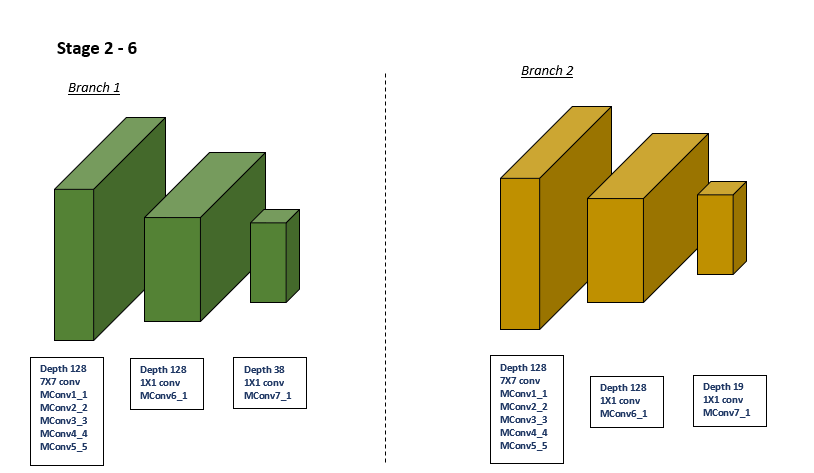

The refinement of the confidence maps and affinity fields is made across stages. To guide the network to iteratively predict confidence maps of body parts in the first branch and PAFs in the second branch, it is applied two loss
functions at the end of each stage, one at each branch respectively.

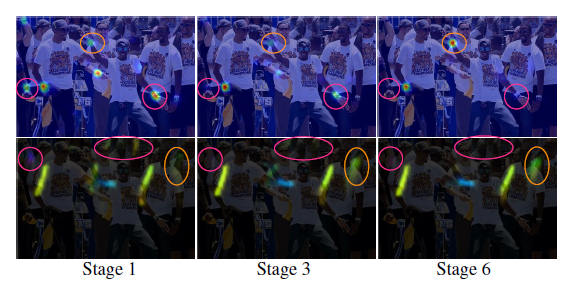

In the following code fragment you can see the detail of the network

In [5]:
model = get_model('vgg19')   
model.load_state_dict(torch.load(args.weight))
model = torch.nn.DataParallel(model).cuda()
model.float()
model.eval()

Bulding VGG19
Done !


DataParallel(
  (module): rtpose_model(
    (model0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)

### ***Training explination***

Explicar como obtienen los keypoint y los Pafs

As explained above we have a set of confidence maps $S$ and a set of part affinity fields $L$, the cost function for training each branch is given by:

$$f^{t}_{S} = \sum_{j=1}^{J}\sum_{P}^{} W(p) \left \| S^{t}_{j} - S^{*}_{j}(p)  \right \| _2 ^2 $$

$$ f^{t}_{L} = \sum_{c=1}^{C}\sum_{P}^{} W(p) \left \| L^{t}_{c} - L^{*}_{c}(p)  \right \| _2 ^2 $$

Where J is the set of confidence maps, C is the set of vectors fields and P is a location on the image. 

The intermediate supervision at each stage addresses the vanishing gradient
problem by replenishing the gradient periodically

$$ f = \sum_{t=1}^{T} (f^{t}_{S} + f^{t}_{L}) $$

#### ***Confidence Maps for Part Detection***

In order to evaluate the lost function $f_{S}$ the groundtruth confidence maps $S^* $ are generated from the annotated 2D keypoints. Each confidence map is a 2D representation of the belief that a particular body part occurs at each pixel location.

First are generated individual confidence maps (one per person detected ) $ S^*_{j,k}$ of a part $j$ for each person $k$ in the image. Let $x_{j,k} \in \mathbb{R} ^2$ be the groundtruth position of body part $j$ for $k$ person in the image. The value at location $ p \in \mathbb{R} ^2$ is defined as:

$$ S^*_{j,k} (p) = exp \left ( \frac{\left \| p - x_{j,k}  \right \| _2 ^2}{\sigma ^2} \right ) $$

The groundtruth confidence map to be predicted by the network is an aggregation
of the individual confidence maps via a max operator.

$$ S^*_{j} (p) = max_{k} S^*_{j,k}(p)$$

#### ***Part Affinity Fields for Part Association***

The part affinity is a 2D vector field for each limb, for each pixel in the area belonging to a particular limb, a 2D vector encodes the direction that points from one part of the limb to the other. Each type of limb has a corresponding affinity field joining its two associated body parts. Consider the next figure:

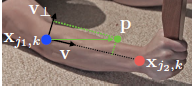

In the figure, $x_{j1,k}$ and $x_{j2,k}$ be the groundtruth positions of body parts $j1$ and $j2$ from the limb $c$ of person $k$ in the image. If a position lies on the limb, the value at $L^*_{c,k} (p)$ is a unit vector that points from $j1$ to $j2$, for all other points, the vector is zero-valued.

To evaluate $f_{L}$ during training, the groundtrith part affinity vector field, $L^*_{c,k}$ at an image point p as:

$$ L^*_{c,k}(p)
   = \begin{cases}
v & \text{ if p on limb c,k}  \\ 
0 & \text{ otherwise } 
\end{cases} $$

Here $ v = (x_{j2,k} - x_{j1,k}) / \left \| x_{j2,k} - x_{j1,k} \right \|_{2} $ is the unit vector in the direction of the limb


The groundtruth part affinity field averages the affinity
fields of all people in the image: 

$$ L^*_{c}(p) = \frac{1}{n_{c}(p)} \sum_{}^{k} L^*_{c,k}(p)$$

where nc(p) is the number of non-zero vectors at point p across all k people

During testing, is measured the alignment of the predicted PAF with the candidate limb that would be formed by connecting the detected body parts. For two candidate part locations $d_{j1}$ and $d_{j2}$ , is sampled the predicted part affinity field, $L_{c}$ along the line segment to measure the confidence in their association:

$$ E = \int_{u=0}^{u=1} L_{c}(p(u)) * \frac{d_{j2}-d_{j1}}{\left \| d_{j2}-d_{j1} \right \|_{2}}$$

where $p(u)$ interpolates the position of the two body parts $d_{j1}$ and $d_{j2}$ 

$$ p(u) = (1-u)d_{j1} + ud_{j2}$$


#### ***Flow diagram of trainning***

In the following flow chart the model training process is presented in general. Initially, the information is divided into three parts: training, validation and testing. The training is executed in a total number of 5 epochs, but internally the recursive network has a total of 6 steps. The training is divided in two branches: heat maps and pafs, one for each branch of architecture. The training is done in a parallel way of both and the criterion to evaluate the predictions is the Mean square Error . At the end of the steps of the recurrent network (each branch) a sum is made, on the errors obtained in each step, at the end this error is used to optimize the network, calculate the gradiengte and update the parameters by means of backpropagation.

Once the training is finished, the validation of the model is done, and the best model is stored, that is to say the one that has a minor validation error, and the process is repeated until completing the 5 epochs of the training


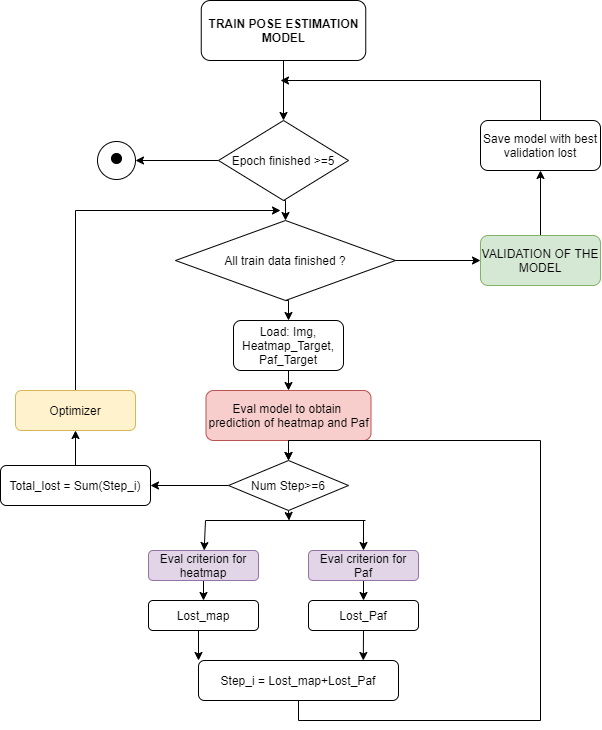

### ***Test image***

Then we will proceed to test the performance of the network with a test image. In the following code the image to be tested is presented

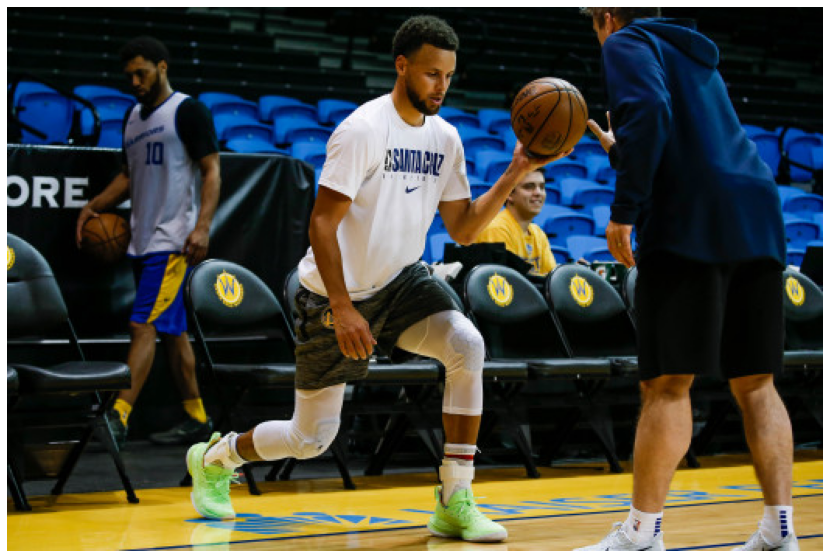

In [6]:
test_image = './readme/curry.jpg'
oriImg = cv2.imread(test_image) # B,G,R order
shape_dst = np.min(oriImg.shape[0:2])
destRGB = cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,10))
imgplot = plt.imshow(destRGB)
plt.axis('off')
plt.show()

#### ***Confidence Maps for Part Detection and Part Affinity Fields for Part Association***

This section will show the different steps that the network runs in order to determine the position of people

##### ***Maps for Part Detection***

Each confidence map is a 2D representation of the belief that a particular body part occurs at each pixel location. Ideally, if a single person occurs in the image, a single peak should exist in each confidence map if the corresponding part is visible; if multiple people occur, there should be a peak corresponding to each visible part j for each person k.

In [7]:
# Get results of original image

with torch.no_grad():
    paf, heatmap, im_scale = get_outputs(oriImg, model,  'rtpose')
          
#print('Mean Average Precision: {}'.format(im_scale))

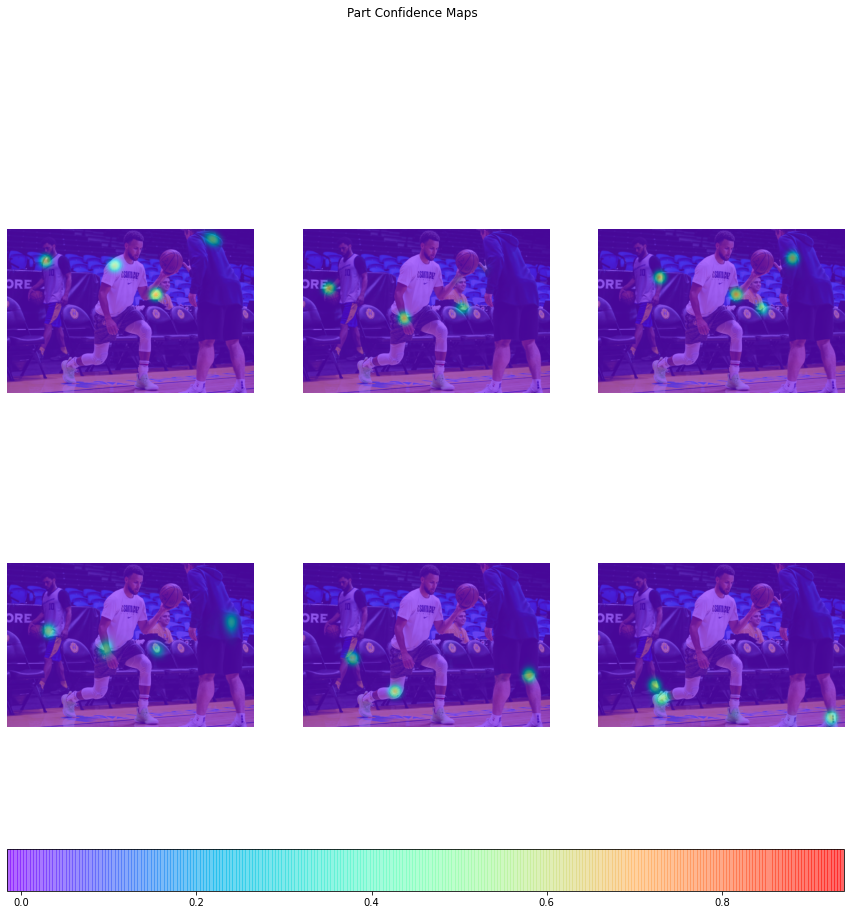

In [8]:
# There is a heat map by area of the body found as shown below
# Nose = 0, Neck = 1, RShoulder = 2, RElbow = 3, RWrist = 4, LShoulder = 5, LElbow = 6, LWrist = 7
# RHip = 8, RKnee = 9, RAnkle = 10, LHip = 11, LKnee = 12, LAnkle = 13, REye = 14, LEye = 15, REar = 16, 
# LEar = 17,Background = 18

from matplotlib import colors

img = plt.imread('./readme/curry.jpg')
Grahp=[2,4,6,8,9,10]  #Desired Heatmaps to graph
graphGridHeatmap(img,Grahp,heatmap,plt,colors)

##### **Part Affinity Fields for Part Association**
For each connection between the parts detected by the trusted potatoes, there are two layers that represent the affinity field of those connections. In other words, an affinity field shows the probable normalized direction of a pixel towards its corresponding connection pixel, and two coordinates ($x_{j_1,k}$ and $x_{j_2,k}$) for $k$-limb conection are needed to describe this direction. If we plot some part affinity fields in the original image, we can see the limb join field between two parts of the body, for each person. The following code show some part affinity fields in the original image:

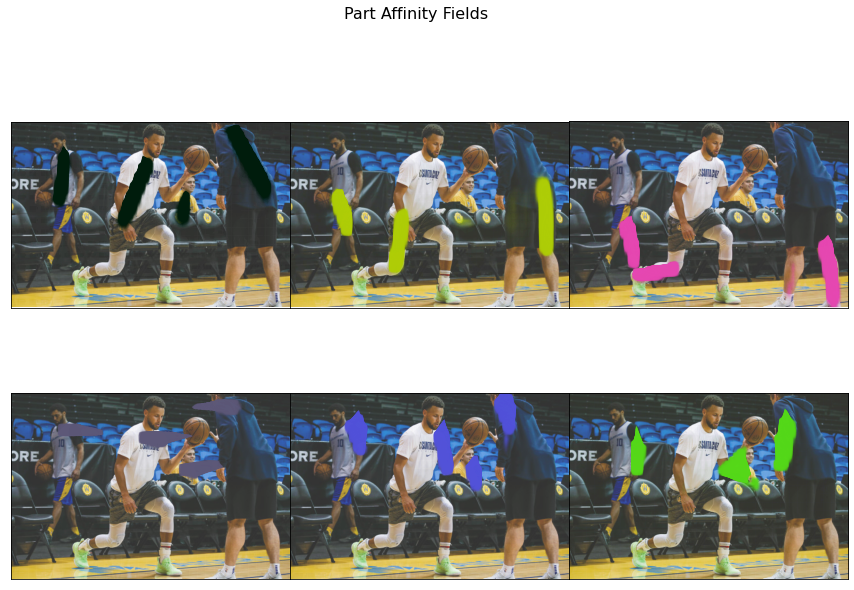

In [9]:
# The order to swap left and right of heatmap
    #swap_heat = np.array((0, 1, 5, 6, 7, 2, 3, 4, 11, 12,
                        #  13, 8, 9, 10, 15, 14, 17, 16, 18))

    # paf's order
    # 0,1 2,3 4,5
    # neck to right_hip, right_hip to right_knee, right_knee to right_ankle

    # 6,7 8,9, 10,11
    # neck to left_hip, left_hip to left_knee, left_knee to left_ankle

    # 12,13 14,15, 16,17, 18, 19
    # neck to right_shoulder, right_shoulder to right_elbow, right_elbow to
    # right_wrist, right_shoulder to right_ear

    # 20,21 22,23, 24,25 26,27
    # neck to left_shoulder, left_shoulder to left_elbow, left_elbow to
    # left_wrist, left_shoulder to left_ear

    # 28,29, 30,31, 32,33, 34,35 36,37
    # neck to nose, nose to right_eye, nose to left_eye, right_eye to
    # right_ear, left_eye to left_ear So the swap of paf should be:
    #swap_paf = np.array((6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 20, 21, 22, 23,
                       #  24, 25, 26, 27, 12, 13, 14, 15, 16, 17, 18, 19, 28,
                        # 29, 32, 33, 30, 31, 36, 37, 34, 35))

    #flipped_paf = flipped_paf[:, ::-1, :]

paf_view = [0,1,2,10,11,12] #Desired Paf to view
graphGridPaf(img,paf,paf_view,plt,np,cv2)

mAP: 1.0514285714285714 


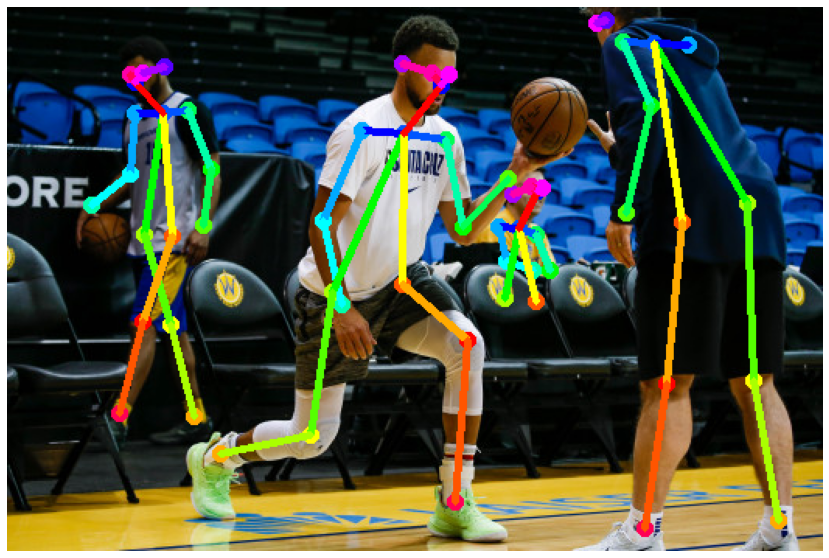

In [12]:
print("mAP: {} ".format(im_scale))
humans = paf_to_pose_cpp(heatmap, paf, cfg)
        
out = draw_humans(oriImg, humans)
destRGB_2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,10))
imgplot = plt.imshow(destRGB_2)
plt.axis('off')
plt.show()

In [13]:
print(heatmap.shape)
print(paf.shape)

(46, 69, 19)
(46, 69, 38)


## **Replication of results**
In this section we replicated some resutls. First, we need download the data. For this case, we will use the `sh` compiler provided by [original repository](https://github.com/tensorboy/pytorch_Realtime_Multi-Person_Pose_Estimation)

In [14]:
%cd $colab_path"/RT-multiperson-pose-pytorch"
data_download = False # For download COCO dataset
if data_download and not os.path.isdir("data/coco"):
  !mkdir data
  %cd data
  !sh ../lib/datasets/CocoDataDownloader.sh
  %cd $colab_path"/RT-multiperson-pose-pytorch"
  output.clear()
  print("[INFO]: Coco database downloaded successfully")

/content/gdrive/My Drive/Colab Notebooks/RT-multiperson-pose-pytorch


Now, we defined some principal functions and the neuronal network architecture.

In [15]:
%cd $colab_path"/RT-multiperson-pose-pytorch"
def load_rtpose_model():
  model = get_model('vgg19')     
  model.load_state_dict(torch.load(args.weight))
  model = torch.nn.DataParallel(model).cuda()
  model.float()
  model.eval()
  return model

def im_forward(image, model):
  with torch.no_grad():
    paf, heatmap, im_scale = get_outputs(image, model, 'rtpose')
  return paf, heatmap, im_scale

def human_forward(image, model):
  paf, heatmap, im_scale = im_forward(image, model)
  humans = paf_to_pose_cpp(heatmap, paf, cfg)
  return draw_humans(image, humans), humans

rtpose_model = load_rtpose_model()

/content/gdrive/My Drive/Colab Notebooks/RT-multiperson-pose-pytorch
Bulding VGG19
Done !


In order to display some results, images will be chosen at random to reproduce the paper's results. A grid will be created with some samples.

In [16]:
def readFileList(file_directory, ext = 'jpg'):
  files_list = []
  if os.path.isdir(file_directory): # Return files with 'json' extension
    for root_path, _, files_name in os.walk(file_directory):
      files_list += [os.path.join(root_path, element) for element in files_name if element.split(".")[-1].lower() == ext.lower()]
  elif file_directory.split('.')[-1] == ext: files_list = [file_directory] # Return file inside of list
  return files_list

file_list = readFileList("./data/coco/images/test2017")
if len(file_list) > 0:
  print("[INFO]: Images through RT-multiperson pose 2D:")
  fig = plt.figure(figsize=(20, 15), constrained_layout=False)
  gs = fig.add_gridspec(nrows=30, ncols=19, wspace=0.0, hspace=0.0)
  fig_axes = {
      fig.add_subplot(gs[:12, :6]): {"id": "image1_1"}, # First column
      fig.add_subplot(gs[12:20, :6]): {"id": "image2_1"},
      fig.add_subplot(gs[20:, :7]): {"id": "image3_1"},
      fig.add_subplot(gs[:8, 6:13]): {"id": "image1_2"}, # Second column
      fig.add_subplot(gs[8:20, 6:13]): {"id": "image2_2"},
      fig.add_subplot(gs[20:, 7:13]): {"id": "image3_2"},
      fig.add_subplot(gs[:7, 13:]): {"id": "image7"}, # Third column
      fig.add_subplot(gs[7:16, 13:]): {"id": "image8"},
      fig.add_subplot(gs[16:22, 13:]): {"id": "image9"},
      fig.add_subplot(gs[22:, 13:]): {"id": "image10"},
  }

  for ax, prop in fig_axes.items():
    human_det = []
    while len(human_det) == 0:
      image = cv2.imread(np.random.choice(file_list))
      image_rt, human_det = human_forward(image, rtpose_model)
    ax.imshow(cv2.cvtColor(image_rt, cv2.COLOR_BGR2RGB), aspect = "auto")
    ax.set_xticklabels([]); ax.set_yticklabels([])
    ax.set_xticks([]); ax.set_yticks([]); ax.axis("on")

  fig.show()

Also, we can estimate the AP and AR with the following code (to valid test):

In [17]:
run = False
try:
    if run: 
        run_eval(image_dir= './data/coco/images/val2017', 
                 anno_file = './data/coco/annotations/annotations/person_keypoints_val2017.json', 
                 vis_dir = './data/coco/images/vis_val2017', model=model, preprocess='vgg')
except:
  pass

The summary of the evaluation statistics are presented below. For the validation set, we can see that the model is recognizing about 13% of the cases correctly, of which we can be sure that about 20% are being well detected.

<table>
<tbody>
  <tr>
    <th>Average Precision (AP)</th> <th>IoU=0.50:0.95</th> <th>area = all</th> <th>maxDets = 20</th> <th>0.091</th>
  </tr>
  <tr>
    <th>Average Precision (AP)</th> <th>IoU=0.50</th> <th>area = all</th> <th>maxDets = 20</th> <th>0.223</th>
  </tr>
  <tr>
    <th>Average Precision (AP)</th> <th>IoU=0.75</th> <th>area = all</th> <th>maxDets = 20</th> <th>0.057</th>
  </tr>
  <tr>
    <th>Average Precision (AP)</th> <th>IoU=0.50:0.95</th> <th>area = medium</th> <th>maxDets = 20</th> <th>0.131</th>
  </tr>
  <tr>
    <th>Average Precision (AP)</th> <th>IoU=0.50:0.95</th> <th>area = large</th> <th>maxDets = 20</th> <th>0.091</th>
  </tr>
  <tr>
    <th>Average Recall (AR)</th> <th>IoU=0.50:0.95</th> <th>area = all</th> <th>maxDets = 20</th> <th>0.188</th>
  </tr>
  <tr>
    <th>Average Recall (AR)</th> <th>IoU=0.50</th> <th>area = all</th> <th>maxDets = 20</th> <th>0.350</th>
  </tr>
  <tr>
    <th>Average Recall (AR)</th> <th>IoU=0.75</th> <th>area = all</th> <th>maxDets = 20</th> <th>0.167</th>
  </tr>
  <tr>
    <th>Average Recall (AR)</th> <th>IoU=0.50:0.95</th> <th>area = medium</th> <th>maxDets = 20</th> <th>0.140</th>
  </tr>
  <tr>
    <th>Average Recall (AR)</th> <th>IoU=0.50:0.95</th> <th>area = large</th> <th>maxDets = 20</th> <th>0.255</th>
  </tr>
</tbody>
</table>

## **Applications**
Some applications in the field of deep learning have been developed in recent years with themes relating to the detection of the position of people in different scenes. Some of these include the classification of postures, detection of people in position, robots assisted living, character animation, video games industry, medical applications such as postural corrections, and anothers [interesting projects](https://medium.com/beyondminds/an-overview-of-human-pose-estimation-with-deep-learning-d49eb656739b). Below are some articles of interest:

1.   [Multi-Person Pose Estimation for Pose Tracking with Enhanced Cascaded Pyramid Network](https://openaccess.thecvf.com/content_ECCVW_2018/papers/11130/Yu_Multi-Person_Pose_Estimation_for_Pose_Tracking_with_Enhanced_Cascaded_Pyramid_ECCVW_2018_paper.pdf)
2.   [Single-Stage Multi-Person Pose Machines](https://arxiv.org/pdf/1908.09220.pdf)
3.   [Rehabilitation Posture Correction Using Deep Neural
Network](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7881743)
4.   [Pose Trainer: Correcting Exercise Posture using Pose Estimation](https://arxiv.org/abs/2006.11718)



In this notebook, we will attack in a particular aplication: The detection of multiple person poses in videos and their prediction in future frames. For this, we will use a set of 8 own videos as database. 

### Problem context

We must understand that for every image in the video, we have that the network predicts an affinity map and a body part map, with sizes  $(H,W,38)$ and $(H,W,19)$, respectively, with $H$ and $W$ the resulting dimensions of the RT-pose model (depending on each input image). To predict the pose in future frames of a video we will use this information as an RCNN target, coupling each detection in a single tensor. The idea will be to be able to predict these two maps of a given frame a map of the current state, using 10 past maps as a basis for predicting 1 map in the future.

### Database

For didactic purposes, different physical activities were recorded with a **static camera**, in a total of 10 minutes of recording. In each video, only one person appears (or not), in order to improve the training of the network.

Each video was divided as follows:
 - The first part of the video will be used as training (70% of the total video).
- The remaining 30% of the video will be used as validation/testing.

Note: The path of all videos is `./data/Videos_Deep_Training/`, and each video is stored in the `Entrenamiento`, `Validacion`, `Test`, respectively. In general, the organization scheme of the database is:

    - `./data/Videos_Deep_Training`
    | -- `Entrenamiento` 
    | -- `Validacion` 
    | -- `Test` 

### Architecture implementation in videos
Let's start with the implementation of the architecture in a test video. We will make the frame to frame reading, showing the result of the estimation, in order to better understand our problem.

In [18]:
''' Extract properties from video '''
def video_prop_read(video_path, force_mp4 = True):
    video = cv2.VideoCapture(video_path) # Read video
    w,h = int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_fps = video.get(cv2.CAP_PROP_FPS)
    codec = [chr((int(video.get(cv2.CAP_PROP_FOURCC)) >> 8 * i) & 0xFF) for i in range(4)]
    video_size = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    video.release()
    if "mp4" in os.path.splitext(video_path)[-1].lower() or force_mp4: codec = ['m', 'p', '4', 'v']
    if video_size <= 0: video_size = np.inf
    if video_fps <= 0 or video_fps == np.inf: video_fps = 25 # Default value
    return w, h, video_fps, codec, video_size

''' Show embed video'''
def show_video(video_path):
    filename, ext = os.path.splitext(video_path)
    if os.path.isfile(video_path):
        if "mp4" not in ext.lower():
            filename += ".mp4"
            !sudo ffmpeg -t 5 -i "$video_path" "$filename" # Convert any ext to mp4
            output.clear()
            video_path = filename
        video = Video.from_file(video_path)
    else:
        print("[ERROR] Video file not found. Please check path.")
        video = None
    return video

''' Draw humans in video '''
def video_forward(video_in, fps = None, video_out_path = None, force_mp4 = True,
                  total_frames = None, skip_frames = None, resize = None, 
                  background = True, print_im = False):
    # Read video properties
    video_w, video_h, video_fps, video_codec, video_size = video_prop_read(video_in, force_mp4)
    video = cv2.VideoCapture(video_in)

    # Video object to save and video_in read
    if fps is not None and fps < video_fps: video_fps = fps
    if video_out_path is not None:
        video_out_path, ext = os.path.splitext(video_out_path)
        if force_mp4: video_out_path += ".mp4"
        elif len(ext) == 0: video_out_path += os.path.splitext(video_in)[-1]
        else: video_out_path += ext
        if resize is not None: video_w, video_h = resize
        video_out = cv2.VideoWriter(video_out_path, cv2.VideoWriter_fourcc(*video_codec), 
                                    video_fps, (video_w, video_h))
        print("[INFO]: Video will be saved in", video_out_path)

    fcount = 0; tic = time.time(); total_paf = []; total_heat = []; sizes = []; rcount = 0
    while video.isOpened():
        ret, frame = video.read(); fcount += 1
        if fps is not None and fcount % (fps//video_fps) != 0: continue # Skip frames
        rcount += 1
        if skip_frames is not None and rcount <= skip_frames : continue # Skip frames
        if (cv2.waitKey(1) & 0xFF == ord('q')) or not ret: break # End of video

        # Detection process
        paf, heatmap, im_scale = im_forward(frame, rtpose_model) # CNN maps
        total_paf += [paf]; total_heat += [heatmap]; sizes += [im_scale] # Concat detections

        # Save pose-detection in video_out
        if video_out_path is not None or print_im:
            humans = paf_to_pose_cpp(heatmap, paf, cfg)
            if not background: frame = np.zeros(frame.shape, dtype = "uint8")
            frame_out = draw_humans(frame, humans)
            if resize is not None: frame_out = cv2.resize(frame_out, resize)
            if video_out_path is not None: video_out.write(frame_out)
        
        # if isprogrammer: cv2.imshow("output.mp4", frame)
        if fcount % 30 == 0:
            print("[INFO]: {} of {} frames processed.".format(fcount, video_size))
            if print_im: 
                plt.imshow(cv2.cvtColor(frame_out, cv2.COLOR_BGR2RGB))
                plt.axis("off"); plt.show()
        
        if total_frames is not None and rcount >= total_frames: break # End
        
    video.release()
    if video_out_path is not None: 
        video_out.release()
        if "mp4" in os.path.splitext(video_out_path)[-1]:
            video_out_path_compress = video_out_path.replace(".mp4","_out.mp4")
            !sudo ffmpeg -t 5 -i "$video_out_path" "$video_out_path_compress" # Compress
            !mv "$video_out_path_compress" "$video_out_path"
            !rm "$video_out_path_compress"
            output.clear()
        print("[INFO]: Video saved successfully")
    print("[INFO]: Total time spend in procedure:", time.time() - tic, "s")
    if len(total_paf) == 0: return None, None, None
    else: return np.stack(total_paf, axis = 0), np.stack(total_heat, axis = 0), sizes

In [19]:
video_path_proof = "./data/Videos_Deep_MiosHAHA/Entrenamiento/Original1_Train.mp4"
demo_pred = video_forward(video_path_proof, video_out_path = "./demo/video_demo", 
                          resize = (720,480), fps = 150, background = True, print_im = True)
print(demo_pred[0].shape, demo_pred[1].shape)

[INFO]: Video saved successfully
[INFO]: Total time spend in procedure: 15.214159488677979 s
(47, 46, 82, 38) (47, 46, 82, 19)


In [20]:
show_video("./demo/video_demo.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x07\xc1\xb5mdat\x0…

### Pose-database creation
After we have tested the network in a simple video, we will read the test, train and validation video list files.

In addition, we will perform a mini-batch training, where each batche will be represented by each video. Therefore, we will define a function that will allow us to process each video and organize it in tensors, so that it organizes the information for the input/output training process. As the input is the composition of the prediction in $N$ previous states to predict the following state (output), the dimensions of the input tensor will be of $(x,N,H,W,19)$ to heatmap and $(x,N,H,W,38)$ to part affinity fields (PAF), with $x$ number of images. For outputs, in general terms we will have a $(x,1,H,W,C)$ size, with $C$ the depth of the prediction ($C = 19$ for the heatmap and $C = 38$ for the PAF). 

Finally, we will join the block of images $N$ needed to predict the next image in a single batch, so that the first $N$ layers *in the time dimension* should be used as input to predict the future blocks of images (for the project, a single state). With this, each video will be splitted in mini-batches, all joins in a unique $(k,N+1,C,H,W)$ batch. Note that we have changed the position of the depth for each map, in order to correctly perform the convolutional operation within the network.

**Note:** We call *image* the representation of the original image in its respective heat map and PAF, since it is a representation of the original image with the relevant information for the project. Not to be confused with "original image".

In [21]:
random_state = 42
np.random.seed(random_state)
videoloaders = {x:readFileList("./data/Videos_Deep_MiosHAHA/" + y, ext = "mp4") for x,y in zip(["train","valid","test"],["Entrenamiento","Validacion","Test"])}
video_set_sizes = {x: len(videoloaders[x]) for x in ['train', 'valid', 'test']}
print(video_set_sizes)

{'train': 8, 'valid': 8, 'test': 8}


In [22]:
# Load (predict) video and split it in in/out tensor
def video_batch(video_path, n_past_step = 12, n_fut_step = 12, 
                batch_size = None, skip_batch = None, **kwargs): # (b,t,c,h,w)
    total_frames = batch_size; skip_frames = skip_batch
    if skip_frames is not None: skip_frames *= n_past_step + n_fut_step
    if batch_size is not None: 
        total_frames *= n_past_step + n_fut_step
        if skip_frames is not None: total_frames += skip_frames
        
    tpaf, theat, _ = video_forward(video_path, # Video forward in RT-model (frames,h,w,c)
            total_frames = total_frames, skip_frames = skip_frames, **kwargs)
    if tpaf is None or theat is None: return None, None
    paf_batch, heat_batch = [], []
    for t in range(len(tpaf)//(n_past_step + n_fut_step)): # Batches of (B,n_steps,H,W,C)
        paf_batch.append(tpaf[t*(n_past_step + n_fut_step):(t+1)*(n_past_step + n_fut_step)])
        heat_batch.append(theat[t*(n_past_step + n_fut_step):(t+1)*(n_past_step + n_fut_step)])
    if len(heat_batch) == 0 or len(paf_batch) == 0: return None, None
    paf_batch = torch.from_numpy(np.stack(paf_batch, axis = 0)).float()
    heat_batch = torch.from_numpy(np.stack(heat_batch, axis = 0)).float()
    return paf_batch.permute(0,1,4,2,3), heat_batch.permute(0,1,4,2,3) # Tensors organize to (B,past+future,C,H,W)

### RCNN architecture

The definition of the architecture was taken from [Video Prediction using ConvLSTM Autoencoder (PyTorch)](https://holmdk.github.io/2020/04/02/video_prediction.html) online article. Some modifications in the autoencoder were made, in order to create two LSTMconv encoder/decoder models (one to predict the heat map and other the PAF map). The proposed solution architecture would be represented by the block diagram:

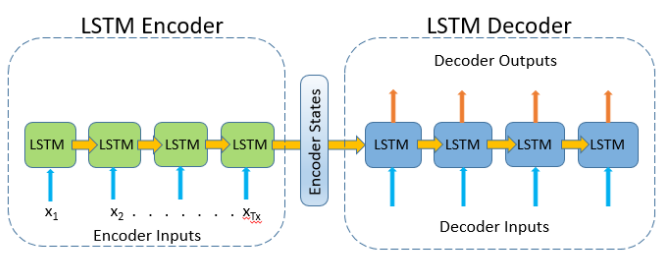


In [23]:
''' Defined a single convLSTM module '''
class ConvLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        """
        Initialize ConvLSTM cell.

        Parameters
        ----------
        input_dim: int # Number of channels of input tensor.
        hidden_dim: int # Number of channels of hidden state.
        kernel_size: (int, int) # Size of the convolutional kernel.
        bias: bool # Whether or not to add the bias.
        """

        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(in_channels = self.input_dim + self.hidden_dim,
                              out_channels = 4 * self.hidden_dim,
                              kernel_size = self.kernel_size,
                              padding = self.padding, bias = self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state

        # concatenate along channel axis
        combined = torch.cat([input_tensor, h_cur], dim = 1) # (B,c,h,w)

        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim = 1)
        i = torch.sigmoid(cc_i) # (B, hidden, h, w)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))

In [24]:
class EncoderDecoderConvLSTM(nn.Module):
    def __init__(self, nf, in_chan):
        super(EncoderDecoderConvLSTM, self).__init__()

        """ ARCHITECTURE 

        # Encoder (ConvLSTM)
        # Encoder Vector (final hidden state of encoder)
        # Decoder (ConvLSTM) - takes Encoder Vector as input
        # Decoder (3D CNN) - produces regression predictions for our model

        """
        # PAF predictions
        self.encoder_1_convlstm = ConvLSTMCell(input_dim=in_chan[0], hidden_dim=nf, kernel_size=(3, 3), bias=True)
        self.decoder_1_convlstm = ConvLSTMCell(input_dim=nf, hidden_dim=nf, kernel_size=(3, 3), bias=True)
        self.decoder_1_CNN = nn.Conv3d(in_channels=nf, out_channels=in_chan[0], kernel_size=(1, 3, 3), padding=(0, 1, 1))

        # Heatmap predictions
        self.encoder_2_convlstm = ConvLSTMCell(input_dim=in_chan[1], hidden_dim=nf, kernel_size=(3, 3), bias=True)
        self.decoder_2_convlstm = ConvLSTMCell(input_dim=nf, hidden_dim=nf, kernel_size=(3, 3), bias=True)
        self.decoder_2_CNN = nn.Conv3d(in_channels=nf, out_channels=in_chan[1], kernel_size=(1, 3, 3), padding=(0, 1, 1))

    def autoencoder(self, x, seq_len, future_step, h_t, c_t, h_t2, c_t2, h_t3, c_t3, h_t4, c_t4):
        # encoder
        for t in range(seq_len):
            h_t, c_t = self.encoder_1_convlstm(input_tensor = x[0][:, t, :, :, :], cur_state=[h_t, c_t])
            h_t2, c_t2 = self.encoder_2_convlstm(input_tensor = x[1][:, t, :, :, :], cur_state=[h_t2, c_t2])
        
        encoder_vector = [h_t, h_t2] # (B, Hidden, H, W)

        # decoder
        paf_outputs, heat_outputs = [], []
        for t in range(future_step):
            h_t3, c_t3 = self.decoder_1_convlstm(input_tensor=encoder_vector[0], cur_state=[h_t3, c_t3])
            h_t4, c_t4 = self.decoder_2_convlstm(input_tensor=encoder_vector[1], cur_state=[h_t4, c_t4])
            encoder_vector = [h_t3, h_t4] # (B,hidden,H,W)
            paf_outputs += [h_t3]; heat_outputs += [h_t4] # predictions

        # PAF prediction
        paf_outputs = torch.stack(paf_outputs, dim = 1) # (B,future_step,hidden,H,W)
        paf_outputs = paf_outputs.permute(0, 2, 1, 3, 4) # (B,hidden,future_step,H,W)
        paf_outputs = self.decoder_1_CNN(paf_outputs) # (B,C,future_step,H,W)
        paf_outputs = torch.nn.Tanh()(paf_outputs)
        paf_outputs = paf_outputs.permute(0, 2, 1, 3, 4) # (B,future_step,C,H,W)

        # Heat predictions
        heat_outputs = torch.stack(heat_outputs, dim = 1) # (B,future_step,hidden,H,W)
        heat_outputs = heat_outputs.permute(0, 2, 1, 3, 4) # (B,hidden,future_step,H,W)
        heat_outputs = self.decoder_2_CNN(heat_outputs) # (B,C,future_step,H,W)
        heat_outputs = torch.nn.Tanh()(heat_outputs)
        heat_outputs = heat_outputs.permute(0, 2, 1, 3, 4) # (B,future_step,C,H,W)
        return paf_outputs, heat_outputs
    
    def forward(self, x, n_step_fut, hidden_state = None):

        """
        Parameters
        ----------
        input_tensor:
            List with two 5-D Tensor of shape (b, t, c, h, w) # batch, time, channel, height, width
        """

        # find size of different input dimensions
        b, seq_len, _, h, w = x[0].size()

        # initialize hidden states
        if hidden_state is None:
            h_t, c_t = self.encoder_1_convlstm.init_hidden(batch_size=b, image_size=(h, w))
            h_t2, c_t2 = self.encoder_2_convlstm.init_hidden(batch_size=b, image_size=(h, w))
            h_t3, c_t3 = self.decoder_1_convlstm.init_hidden(batch_size=b, image_size=(h, w))
            h_t4, c_t4 = self.decoder_2_convlstm.init_hidden(batch_size=b, image_size=(h, w))
        else:
            (h_t, c_t), (h_t2, c_t2), (h_t3, c_t3), (h_t4, c_t4) = hidden_state

        # autoencoder forward
        outputs = self.autoencoder(x, seq_len, n_step_fut, h_t, c_t, h_t2, c_t2, h_t3, c_t3, h_t4, c_t4)

        return outputs

### Training model

Below is the definition of functions used in the training procedure. In addition to the basic training phases of any model using the pytorch library (forward, loss function, gradient and optimizer), procedures for temporary storage of the training state in each layer, as well as the weights of the architecture, were developed. The functions presented allow to resume the training, in case of any problem with the machine. Finally, when the training ends, the function allows to load the trained network.

In [25]:
def train_step(model, criterion, optimizer = None, phase = 'valid', **kwargs):
    if phase == 'train': model.train()  # Set model to training mode
    else: model.eval() # Set model to evaluate mode

    skip_batch, losses, batch_count = 0, 0.0, 0
    while True:
        paf_batch, heat_batch = video_batch(skip_batch = skip_batch, **kwargs) # Batch of (B,frames,C,H,W)
        if paf_batch is None or heat_batch is None: break # Invalid video read.
        batch_count += 1

        # Batch I/O split
        x_paf = paf_batch[:, :kwargs["n_past_step"]].cuda() # Batch of (B,n_steps,C,H,W)
        y_paf = paf_batch[:, kwargs["n_past_step"]:].cuda() # Batch of (B,future_step,C,H,W)
        x_heat = heat_batch[:, :kwargs["n_past_step"]].cuda() # Batch of (B,n_steps,C,H,W)
        y_heat = heat_batch[:, kwargs["n_past_step"]:].cuda() # Batch of (B,future_step,C,H,W)

        # forward
        with torch.set_grad_enabled(phase == 'train'): # track history if only in train
            y_hat1, y_hat2 = model([x_paf, x_heat], n_step_fut = kwargs["n_fut_step"])
            loss = criterion(y_hat1, y_paf) + criterion(y_hat2, y_heat)
            if phase == 'train': # backward + optimize only if in training phase
                optimizer.zero_grad(); loss.backward(); optimizer.step()

        losses += loss.item() * x_paf.size(0) # Total images
        
        if kwargs["batch_size"] is not None: skip_batch += kwargs["batch_size"]
        else: break # Invalid video read.
    if batch_count == 0: return None
    else: return losses/batch_count

def load_stats(model, stat_name, model_name):
    if stat_name is not None and os.path.isfile(stat_name):
        with open(stat_name, "r") as f: stats = json.load(f) # Recovery stats
        if model_name is not None: stats["model_name"] = model_name
    else:
        stats = {"losses": {"train": [], "valid": []}, "cur_epoch":0, # Variable to save all
                "best_epoch": 0, "best_loss": np.inf, "time_process": 0,
                 "model_name": model_name}
    try:
        model.load_state_dict(torch.load(stats["model_name"]))
        model.cuda()
    except:
        pass
    return model, stats

def training(EDconvLST_model, criterion, optimizer, scheduler = None, num_epochs = 25, 
             model_name = None, early_max = None, n_steps_past = 10, future_step = 10, 
             stat_name = None, batch_size = None):
    
    since = time.time(); count_max = 0; tic = since

    # Model initialization
    EDconvLST_model, stats = load_stats(EDconvLST_model, stat_name, model_name)
    t0 = stats["time_process"]
    if stats["cur_epoch"] >= num_epochs: 
        print("[INFO] Model already was training. Return (if exist) the train model")
        if stats["model_name"] is None: EDconvLST_model = None
        return EDconvLST_model, stats
    
    # Train process
    for epoch in range(1, num_epochs+1):
        # torch.cuda.empty_cache()
        if epoch <= stats["cur_epoch"]: continue # Skip epochs
        isprint = num_epochs <= 1000 or (epoch-1) % (num_epochs // 10) == 0 or epoch == num_epochs

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            # Iterate over data.
            running_loss = 0.0
            np.random.shuffle(videoloaders[phase])
            for i,video_path in enumerate(videoloaders[phase]): # Start for
                if isprint: print("[INFO] {}: Reading video {}/{}".format(phase, i, video_set_sizes[phase]))
                
                loss = train_step(EDconvLST_model, criterion, optimizer = optimizer, phase = phase, 
                                  video_path = video_path, n_past_step = n_steps_past, n_fut_step = future_step, 
                                  batch_size = batch_size, resize = (720,480), fps = 150)
                
                if isprint: 
                    output.clear()
                    print('\nEpoch {}/{}\n{}'.format(epoch, num_epochs, '-'*15))
                    if len(stats["losses"]["train"]) > 0: train_loss = stats["losses"]["train"][-1]
                    else: train_loss = np.inf
                    if loss is not None:
                        print('[INFO] {}: Current loss = {:.6f}, last train loss = {:.6f}, best valid loss = {:.6f}'.\
                          format(phase, loss, train_loss, stats["best_loss"]))
                    else:
                        print('[INFO] {}: Last train loss = {:.6f}, best valid loss = {:.6f}'.\
                          format(phase, train_loss, stats["best_loss"]))
            
                if loss is not None: running_loss += loss
            if isprint: output.clear() # Errase print info
            if phase == 'train' and scheduler is not None: scheduler.step()
            stats["losses"][phase].append(running_loss/video_set_sizes[phase])
        
        time_elapsed = time.time() - tic
        if isprint: # Print somethings for some epoch
            print('train Loss: {:.6f} \tvalid Loss: {:.6f}. Spend time:{:.0f}m {:.0f}s'\
                .format(stats["losses"]["train"][-1], stats["losses"]["valid"][-1], time_elapsed // 60, time_elapsed % 60))
            tic = time.time() # For next iteration

        # deep save model
        if stats["losses"]["valid"][-1] < stats["best_loss"]:
            if isprint: 
                print('Valid loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(stats["best_loss"], stats["losses"]["valid"][-1]))
            stats["best_epoch"] = epoch
            stats["best_loss"] = stats["losses"]["valid"][-1]
            best_model_wts = copy.deepcopy(EDconvLST_model.state_dict())
            if model_name is not None: torch.save(best_model_wts, model_name)
            count_max = 0
        else: 
            count_max += 1 
            if early_max is not None and count_max >= early_max: break # Early finish training

        stats["time_process"] = time.time() - since + t0
        stats["cur_epoch"] = epoch
        if stat_name is not None: 
            with open(stat_name, "w") as f: json.dump(stats, f)

    print('\n{}\nTraining complete ({}/{} epochs) in {:.0f}m {:.0f}s'\
          .format('-'*25, epoch, num_epochs, stats["time_process"] // 60, stats["time_process"] % 60))
    print('Best metric (loss): {:4f}'.format(stats["best_loss"]))

    # load best model weights
    EDconvLST_model.load_state_dict(best_model_wts)
    EDconvLST_model.cuda()
    return EDconvLST_model, stats

### User parameters
It's time to train! We will use the functions of the previous sections to define the model and train it. It is the responsibility of the user to choose the optimizer hyperparameters, evaluation criteria of the loss function and the architecture.

In this notebook the best configuration found will be presented, but the different experiments carried out in the whole process are mentioned:

* Past states chosen from 5 to 10.
* Number of epochs between 15, 100, 250, 300 and 1000.
* Number of hidden states in each block LSTMconv of 64.
* Learning rates with values of 1e-1, 1e-2 and 1e-4.
* Learning rate reduction scheduler every 50 epochs.
* MSE criteria by average and by sum. In the end, the sum criterion was chosen, since the heatmap and PAF values are very small, to the point that an MSE value = 1e-4 was not enough for this application.

In [26]:
# User parameters
n_steps_past = 10
n_steps_fut = 1
num_epochs = 300

In [28]:
EDCLSTM_model = EncoderDecoderConvLSTM(nf = 128, in_chan = [38,19])
EDCLSTM_model.cuda()
criterion = nn.MSELoss(reduction = "sum").cuda()
optimizer = torch.optim.Adam(EDCLSTM_model.parameters(), lr = 1e-2, betas=(0.9, 0.98))
optimizer = torch.optim.SGD(EDCLSTM_model.parameters(), lr = 1e-2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 50, gamma = 0.1)

In [29]:
model_file = "EDCLSTM_final_RCNN_T_nf20_lr1e2_past20_batch5.pt"
statistics_file = "EDCLSTM_final_RCNN_T_nf20_lr1e2_past20_batch5.json"
# EDCLSTM_model, EDCLSTM_stats = training(EDCLSTM_model, criterion, optimizer, batch_size = None,
#              num_epochs = num_epochs, early_max = None, n_steps_past = n_steps_past, scheduler = scheduler,
#              future_step = n_steps_fut, stat_name = statistics_file, model_name = model_file)
EDCLSTM_model, EDCLSTM_stats = load_stats(EDCLSTM_model, statistics_file, model_file)

### Evaluation of model performance
In order to conclude on the performance of the model, let us first look at the learning curves in the training and validation phases.

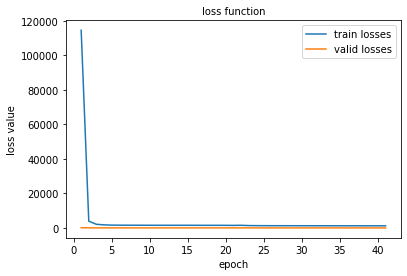

In [30]:
def loss_plot(losses):
    for phase in ["train", "valid"]:
        plt.plot(range(1, len(losses[phase]) + 1), losses[phase], label = phase + " losses")
    plt.legend(prop = {'size': 10})
    plt.title('loss function', size = 10)
    plt.xlabel('epoch', size = 10); plt.ylabel('loss value', size = 10)

loss_plot(EDCLSTM_stats["losses"])

Now, let's evaluate the MSE metrics for the test suite, in terms of assessing the generalization of the solution model presented. Let's use as the same criterion-metric defined by the user as a hyperparameter.

In [ ]:
def test_metrics(model, video_list, criterion, np, nf): # Metricas
    running_loss = 0.0
    for video_path in video_list: # Start for
        loss = train_step(model, criterion, video_path = video_path, 
                          n_past_step = np, n_fut_step = nf, 
                          batch_size = None, resize = (720,480), fps = 150)
        if loss is not None: running_loss += loss
    running_loss /= len(video_list)
    output.clear()
    print("[INFO] Loss in dataset:", running_loss)

test_metrics(EDCLSTM_model, videoloaders["test"], criterion, np = n_steps_past, nf = n_steps_fut)

Finally, let's see the results in videos, based on the procedure of the 'video_forward' function, with the difference that now, `n_steps_past` past frames will be collected to (from that point on) predict the later frames using the trained network. 

In [ ]:
''' Draw humans in video  with detection'''
def video_prediction(model, video_in, step_past, fps = None, video_out_path = None, force_mp4 = True,
                  total_frames = None, skip_frames = None, resize = None, 
                  background = True, print_im = False):
    # Read video properties
    video_w, video_h, video_fps, video_codec, video_size = video_prop_read(video_in, force_mp4)
    video = cv2.VideoCapture(video_in)

    # Video object to save and video_in read
    if fps is not None and fps < video_fps: video_fps = fps
    if video_out_path is not None:
        video_out_path, ext = os.path.splitext(video_out_path)
        if force_mp4: video_out_path += ".mp4"
        elif len(ext) == 0: video_out_path += os.path.splitext(video_in)[-1]
        else: video_out_path += ext
        if resize is not None: video_w, video_h = resize
        video_out = cv2.VideoWriter(video_out_path, cv2.VideoWriter_fourcc(*video_codec), 
                                    video_fps, (video_w, video_h))
        print("[INFO]: Video will be saved in", video_out_path)

    fcount = 0; tic = time.time(); total_paf = []; total_heat = []; rcount = 0
    model.eval()
    while video.isOpened():
        ret, frame = video.read(); fcount += 1
        if fps is not None and fcount % (fps//video_fps) != 0: continue # Skip frames
        rcount += 1
        if skip_frames is not None and rcount <= skip_frames : continue # Skip frames
        if (cv2.waitKey(1) & 0xFF == ord('q')) or not ret: break # End of video

        # Detection process
        if len(total_paf) < step_past:
            paf, heatmap, _ = im_forward(frame, rtpose_model) # CNN maps
            total_paf += [paf]; total_heat += [heatmap]; # Concat detections
            # plt.hist(paf.flatten(), bins = 12); plt.hist(heatmap.flatten(), bins = 12); 
            # plt.show()
        else:
            paf_i, heatmap_i, _ = im_forward(frame, rtpose_model) # CNN maps
            with torch.set_grad_enabled(False):
                x_paf = torch.from_numpy(np.stack(total_paf, axis = 0)[None]).cuda().permute(0,1,4,2,3) # to (B,sp,C,H,W)
                x_heat = torch.from_numpy(np.stack(total_heat, axis = 0)[None]).cuda().permute(0,1,4,2,3) # to (B,sp,C,H,W)
                paf, heatmap = model([x_paf, x_heat], n_step_fut = 1) # Only one future prediction
                paf = paf.squeeze().permute(1,2,0).cpu().detach().numpy() # Size of (H,W,C)
                heatmap = heatmap.squeeze().permute(1,2,0).cpu().detach().numpy() # Size of (H,W,C)
            total_paf += [paf]; total_heat += [heatmap]; # Concat detections
            # total_paf = total_paf[-step_past:]; total_heat = total_heat[-step_past:]
            mse = (np.square(paf - paf)).sum(axis=None)
            print("[INFO]: MSE = ", mse)
        
        # Save pose-detection in video_out
        if video_out_path is not None or print_im:
            humans = paf_to_pose_cpp(heatmap, paf, cfg)
            if not background: frame = np.zeros(frame.shape, dtype = "uint8")
            frame_out = draw_humans(frame, humans)
            if resize is not None: frame_out = cv2.resize(frame_out, resize)
            if video_out_path is not None: video_out.write(frame_out)
        
        # if isprogrammer: cv2.imshow("output.mp4", frame)
        if fcount % 1 == 0:
            print("[INFO]: {} of {} frames processed.".format(fcount, video_size))
            if print_im: 
                plt.imshow(cv2.cvtColor(frame_out, cv2.COLOR_BGR2RGB))
                plt.axis("off"); plt.show()
        
        if total_frames is not None and rcount >= total_frames: break # End
        
    video.release()
    if video_out_path is not None: 
        video_out.release()
        if "mp4" in os.path.splitext(video_out_path)[-1]:
            video_out_path_compress = video_out_path.replace(".mp4","_out.mp4")
            !sudo ffmpeg -t 5 -i "$video_out_path" "$video_out_path_compress" # Compress
            !mv "$video_out_path_compress" "$video_out_path"
            !rm "$video_out_path_compress"
            output.clear()
        print("[INFO]: Video saved successfully")
    print("[INFO]: Total time spend in procedure:", time.time() - tic, "s")
    if len(total_paf) == 0: return None, None
    else: return np.stack(total_paf, axis = 0), np.stack(total_heat, axis = 0)

In [ ]:
video_path_proof = "./data/Videos_Deep_MiosHAHA/Entrenamiento/Original1_Train.mp4"
demo_pred2 = video_prediction(EDCLSTM_model, video_path_proof, step_past = n_steps_past, 
                              resize = (720,480), fps = 150, background = True, skip_frames = 6,
                              print_im = True)
print(demo_pred2[0].shape, demo_pred2[1].shape)

## Conclusions

(Coming soon)...

## ***Anexos: GitHub connection***
Here, some commands to upload the github respository

In [ ]:
# Colab libraries
from google.colab import drive
from google.colab import output
drive.mount('/content/gdrive')

%cd "/content/gdrive/My Drive/Colab Notebooks/RT-multiperson-pose-pytorch"
!git branch 
# !git config --list
# !git commit -am "Updating in colab"
!git pull
# !git status

In [ ]:
# Colab libraries
from google.colab import drive
from google.colab import output
import getpass
drive.mount('/content/gdrive')

%cd "/content/gdrive/My Drive/Colab Notebooks/RT-multiperson-pose-pytorch"
# del user, email
if "user" not in globals(): user = input("User github?: ")
if "email" not in globals(): email = input("Email github?: ")

# Password login
try: 
  pwd = getpass.getpass(prompt='{} github password: '.format(user)) 
except Exception as error: 
  print('ERROR', error) 

# Upload from every where
origin = !git config --get remote.origin.url
origin = origin[0].replace("https://","https://{}:{}@".format(user,pwd))

!git config --global user.email $email
!git config --global user.name $user
!git status

x = " "
while x.lower() != "y" and x.lower() != "n": x = input("Continue?...[y/n]: ")

if x.lower() == "y":
  com_message = input("Enter the commit message: ")
  !git add .
  !git commit -am $com_message
  !git push $origin
  !git status
del origin, pwd